In [2]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath(os.path.join("..")))

In [3]:
df_space_groups = pd.read_csv("D:\\felix-ml\\data\\space_groups.csv", index_col="ICSD_code")
df_counts = pd.read_csv("D:\\felix-ml\\data\\space_groups_counts.csv")
space_groups = df_space_groups.to_dict("index")
data_loc = "..\\data\\FDP"

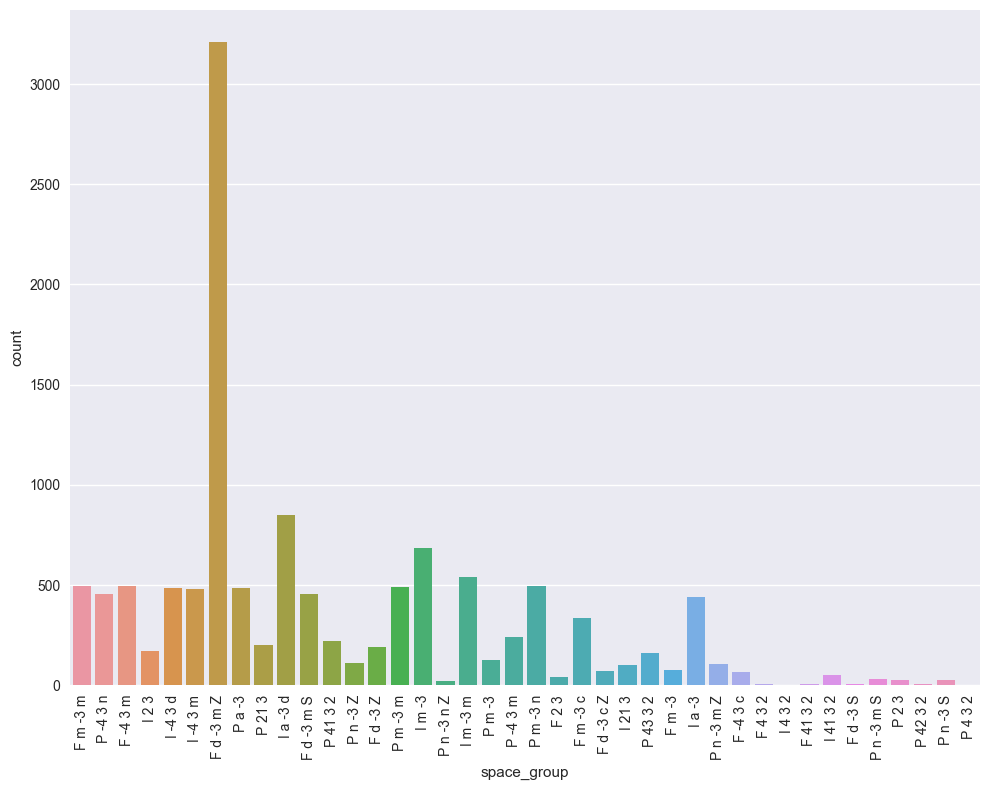

In [4]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

g = sns.barplot(data=df_counts, x="space_group", y="count", ax=ax)
plt.xticks(rotation=90)
# plt.yscale("log")

plt.tight_layout()
plt.show()

In [5]:
data_train, data_val, data_test = torch.utils.data.random_split(
    os.listdir(data_loc),
    lengths=[9_454, 1_500, 1_500],
    generator=torch.Generator().manual_seed(42),
)

In [6]:
distribution = dict()

for ICSD_code in list(os.listdir(data_loc)):
    space_group = space_groups[int(ICSD_code)]["space_group"]
    if space_group not in distribution:
        distribution[space_group] = [0, 0, 0]
    
    if ICSD_code in data_train:
        distribution[space_group][0] += 1
    if ICSD_code in data_val:
        distribution[space_group][1] += 1
    if ICSD_code in data_test:
        distribution[space_group][2] += 1

df_distribution = pd.DataFrame.from_dict(distribution, orient="index", columns=["train", "validation", "test"])
df_distribution.index.name = "ICSD_code"

In [7]:
df_distribution

,train,validation,test
ICSD_code,,,
F m -3 m,366,75,52
P -4 3 n,333,53,70
F -4 3 m,376,44,73
I 2 3,124,23,22
I -4 3 d,372,59,55
I -4 3 m,368,55,59
F d -3 m Z,2438,398,373
P a -3,371,48,65
P 21 3,152,23,24


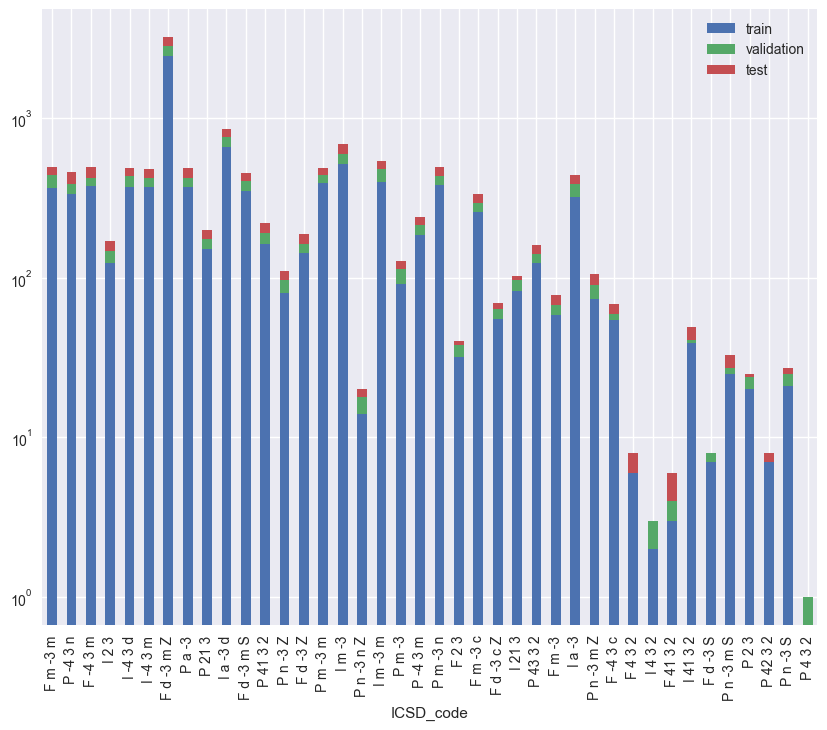

In [8]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df_distribution.plot(kind='bar', stacked=True, ax=ax)
plt.xticks(rotation=90)
plt.yscale("log")

plt.show()